In [66]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import pandas as pd
from matplotlib.pyplot import figure
pd.set_option('display.max_rows', None)
%matplotlib inline


In [2]:
dataset=pd.read_excel('PERM_FY2020_Q3.xlsx')
dataset.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,ORIG_FILE_DATE,PREVIOUS_SWA_CASE_NUMBER_STATE,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FOREIGN_WORKER_ALT_OCC_EXP,FOREIGN_WORKER_EXP_WITH_EMPL,FOREIGN_WORKER_EMPL_PAY_FOR_ED,FOREIGN_WORKER_CURR_EMPLOYED,EMPLOYER_COMPLETED_APPLICATION,PREPARER_NAME,PREPARER_TITLE,PREPARER_EMAIL,EMP_INFO_DECL_NAME,EMP_INFO_DECL_TITLE
0,A-09245-62715,Denied,2009-09-03,2020-04-30 14:50:29,N,NaT,NaN,N,SATURN ENTERPRISES INC,2340 N WASHTENAW AVE,...,NaN,N,N,N,N,Christopher E Kurczaba,Attorney,kurczabalaw@sbcglobal.net,Zygmunt Oparowski,President
1,A-10119-96737,Certified-Expired,2010-03-29,2019-10-18 11:34:37,Y,2000-09-15,MARYLAND,N,FIL PARONG,13528 JAMIESON PL,...,NaN,N,N,N,N,WINSTON W TSAI,ATTORNEY AT LAW,WINSTONTSAI@AOL.COM,FIL PARONG,HEAD OF HOUSEHOLD
2,A-10225-13679,Denied,2010-08-10,2020-04-30 07:55:08,N,NaT,NaN,N,GLENNS PLUMBING SERVICES,854 CUSTER STREET,...,N,N,N,N,N,DANIEL J SULLIVAN,ATTORNEY,GWG8@AOL.COM,DAVID GLENN,OWNER
3,A-11033-51540,Certified,2011-02-03,2020-05-28 08:38:56,N,NaT,NaN,N,SKILLNET SOLUTIONS INC.,1901 SOUTH BASCOM AVENUE,...,Y,N,N,Y,N,Sonal Kinger,Attorney at Law,sonal.kinger@bakerlawcorp.com,Jack Grover,VP of Finance and Operations
4,A-11074-62984,Denied,2011-03-10,2020-06-17 07:50:52,N,NaT,NaN,N,"R L CONSTRUCTION, INC.",904 NEPPERHAN AVENUE,...,NaN,N,N,N,N,DENISE S DUTTON,NONATTORNEY,NaN,RITA O SULLIVAN,MANAGER


In [3]:
len(dataset)

71942

In [4]:
dataset.isnull().sum()

CASE_NUMBER                             0
CASE_STATUS                             0
RECEIVED_DATE                           5
DECISION_DATE                           0
REFILE                                  0
ORIG_FILE_DATE                      71866
PREVIOUS_SWA_CASE_NUMBER_STATE      71863
SCHD_A_SHEEPHERDER                      3
EMPLOYER_NAME                           0
EMPLOYER_ADDRESS_1                      2
EMPLOYER_ADDRESS_2                  47954
EMPLOYER_CITY                           0
EMPLOYER_STATE_PROVINCE                 1
EMPLOYER_COUNTRY                       17
EMPLOYER_POSTAL_CODE                    3
EMPLOYER_PHONE                          0
EMPLOYER_PHONE_EXT                  65879
EMPLOYER_NUM_EMPLOYEES                  9
EMPLOYER_YEAR_COMMENCED_BUSINESS       27
NAICS_CODE                             49
FW_OWNERSHIP_INTEREST                   2
EMP_CONTACT_NAME                        0
EMP_CONTACT_ADDRESS_1                   3
EMP_CONTACT_ADDRESS_2             

In [8]:
#Making a copy of the dataset
dataset_copy = dataset

In [20]:
# Filtering for the columns that are relevant for the analysis

dataset_copy=dataset[['CASE_STATUS',
'REFILE',
'RECEIVED_DATE',
'DECISION_DATE',
'SCHD_A_SHEEPHERDER',
'EMPLOYER_NAME',
'EMPLOYER_CITY',
'EMPLOYER_STATE_PROVINCE',
'EMPLOYER_POSTAL_CODE',
'EMPLOYER_PHONE_EXT',
'EMPLOYER_NUM_EMPLOYEES',
'EMPLOYER_YEAR_COMMENCED_BUSINESS',
'NAICS_CODE',
'FW_OWNERSHIP_INTEREST',
'EMP_CONTACT_CITY',
'EMP_CONTACT_STATE_PROVINCE',
'EMP_CONTACT_COUNTRY',
'EMP_CONTACT_POSTAL_CODE',
'AGENT_ATTORNEY_NAME',
'AGENT_ATTORNEY_FIRM_NAME',
'PW_SOC_TITLE',
'PW_SOC_CODE',
'PW_SKILL_LEVEL',
'PW_WAGE',
'PW_UNIT_OF_PAY',
'JOB_TITLE',
'MINIMUM_EDUCATION',
'JOB_EDUCATION_MIN_OTHER',
'MAJOR_FIELD_OF_STUDY',
'REQUIRED_TRAINING',
'REQUIRED_TRAINING_MONTHS',
'REQUIRED_FIELD_OF_TRAINING',
'REQUIRED_EXPERIENCE',
'REQUIRED_EXPERIENCE_MONTHS',
'ACCEPT_ALT_FIELD_OF_STUDY',
'ACCEPT_ALT_MAJOR_FLD_OF_STUDY',
'ACCEPT_ALT_COMBO',
'ACCEPT_ALT_COMBO_EDUCATION',
'ACCEPT_ALT_COMBO_ED_OTHER',
'ACCEPT_ALT_COMBO_EDUCATION_YRS',
'ACCEPT_FOREIGN_EDUCATION',
'ACCEPT_ALT_OCCUPATION',
'ACCEPT_ALT_OCCUPATION_MONTHS',
'ACCEPT_ALT_JOB_TITLE',
'JOB_OPP_REQUIREMENTS_NORMAL',
'FOREIGN_LANGUAGE_REQUIRED',
'SPECIFIC_SKILLS',
'COMBINATION_OCCUPATION',
'OFFERED_TO_APPL_FOREIGN_WORKER',
'FOREIGN_WORKER_LIVE_ON_PREM',
'FOREIGN_WORKER_LIVE_IN_DOM_SER',
'FOREIGN_WORKER_LIVE_IN_DOM_CNT',
'PROFESSIONAL_OCCUPATION',
'APP_FOR_COLLEGE_U_TEACHER',
'COMPETITIVE_PROCESS',
'BASIC_RECRUITMENT_PROCESS',
'FIRST_NEWSPAPER_NAME',
'SECOND_NEWSPAPER_AD_NAME',
'COUNTRY_OF_CITIZENSHIP',
'CLASS_OF_ADMISSION',
'FOREIGN_WORKER_EDUCATION',
'FOREIGN_WORKER_INFO_MAJOR']]

In [21]:
dataset_copy.head()

,CASE_STATUS,REFILE,RECEIVED_DATE,DECISION_DATE,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE_PROVINCE,EMPLOYER_POSTAL_CODE,EMPLOYER_PHONE_EXT,...,PROFESSIONAL_OCCUPATION,APP_FOR_COLLEGE_U_TEACHER,COMPETITIVE_PROCESS,BASIC_RECRUITMENT_PROCESS,FIRST_NEWSPAPER_NAME,SECOND_NEWSPAPER_AD_NAME,COUNTRY_OF_CITIZENSHIP,CLASS_OF_ADMISSION,FOREIGN_WORKER_EDUCATION,FOREIGN_WORKER_INFO_MAJOR
0,Denied,N,2009-09-03,2020-04-30 14:50:29,N,SATURN ENTERPRISES INC,CHICAGO,ILLINOIS,60647,NaN,...,N,N,NaN,NaN,Chicago Tribune,Chicago Tribune,POLAND,B-2,High School,GENERAL
1,Certified-Expired,Y,2010-03-29,2019-10-18 11:34:37,N,FIL PARONG,GERMANTOWN,MARYLAND,20874,NaN,...,N,N,N,N,WASHINGTON EXAMINER,WASHINGTON EXAMINER,PHILIPPINES,B-2,High School,HIGH SCHOOL
2,Denied,N,2010-08-10,2020-04-30 07:55:08,N,GLENNS PLUMBING SERVICES,N. VALLEY STREAM,NEW YORK,11580,NaN,...,N,N,N,N,NY Post,NY Post,EL SALVADOR,EWI,None,NaN
3,Certified,N,2011-02-03,2020-05-28 08:38:56,N,SKILLNET SOLUTIONS INC.,CAMPBELL,CALIFORNIA,95008,NaN,...,Y,N,NaN,NaN,San Jose Mercury News,San Jose Mercury News,INDIA,H-1B,Other,ELECTRONICS ENGINEERING COMPUTER SCIENCE
4,Denied,N,2011-03-10,2020-06-17 07:50:52,N,"R L CONSTRUCTION, INC.",YONKERS,NEW YORK,10703,NaN,...,N,N,NaN,NaN,NEW YORK POST,NEW YORK POST,IRELAND,NaN,High School,GENERAL


In [22]:
dataset_copy.dtypes

CASE_STATUS                                 object
REFILE                                      object
RECEIVED_DATE                       datetime64[ns]
DECISION_DATE                       datetime64[ns]
SCHD_A_SHEEPHERDER                          object
EMPLOYER_NAME                               object
EMPLOYER_CITY                               object
EMPLOYER_STATE_PROVINCE                     object
EMPLOYER_POSTAL_CODE                        object
EMPLOYER_PHONE_EXT                          object
EMPLOYER_NUM_EMPLOYEES                     float64
EMPLOYER_YEAR_COMMENCED_BUSINESS           float64
NAICS_CODE                                  object
FW_OWNERSHIP_INTEREST                       object
EMP_CONTACT_CITY                            object
EMP_CONTACT_STATE_PROVINCE                  object
EMP_CONTACT_COUNTRY                         object
EMP_CONTACT_POSTAL_CODE                     object
AGENT_ATTORNEY_NAME                         object
AGENT_ATTORNEY_FIRM_NAME       

In [23]:
dataset_copy.isnull().sum()

CASE_STATUS                             0
REFILE                                  0
RECEIVED_DATE                           5
DECISION_DATE                           0
SCHD_A_SHEEPHERDER                      3
EMPLOYER_NAME                           0
EMPLOYER_CITY                           0
EMPLOYER_STATE_PROVINCE                 1
EMPLOYER_POSTAL_CODE                    3
EMPLOYER_PHONE_EXT                  65879
EMPLOYER_NUM_EMPLOYEES                  9
EMPLOYER_YEAR_COMMENCED_BUSINESS       27
NAICS_CODE                             49
FW_OWNERSHIP_INTEREST                   2
EMP_CONTACT_CITY                        1
EMP_CONTACT_STATE_PROVINCE              3
EMP_CONTACT_COUNTRY                    11
EMP_CONTACT_POSTAL_CODE                 4
AGENT_ATTORNEY_NAME                     0
AGENT_ATTORNEY_FIRM_NAME             5956
PW_SOC_TITLE                            9
PW_SOC_CODE                            46
PW_SKILL_LEVEL                       4303
PW_WAGE                           

In [24]:
#Based on the above missing value info, we've decided to remove additional columns

dataset_copy = dataset_copy.drop(['EMPLOYER_PHONE_EXT','FOREIGN_WORKER_LIVE_IN_DOM_CNT'],axis=1)

In [25]:
#The features need to be checked for the unique values to understand the variation of data across different applicants
dataset_copy.nunique()

CASE_STATUS                             4
REFILE                                  2
RECEIVED_DATE                         852
DECISION_DATE                       70688
SCHD_A_SHEEPHERDER                      1
EMPLOYER_NAME                       19918
EMPLOYER_CITY                        4434
EMPLOYER_STATE_PROVINCE               588
EMPLOYER_POSTAL_CODE                 6062
EMPLOYER_NUM_EMPLOYEES               2905
EMPLOYER_YEAR_COMMENCED_BUSINESS      240
NAICS_CODE                           1596
FW_OWNERSHIP_INTEREST                   2
EMP_CONTACT_CITY                     4249
EMP_CONTACT_STATE_PROVINCE            781
EMP_CONTACT_COUNTRY                     5
EMP_CONTACT_POSTAL_CODE              6034
AGENT_ATTORNEY_NAME                  6246
AGENT_ATTORNEY_FIRM_NAME             4928
PW_SOC_TITLE                         5202
PW_SOC_CODE                           633
PW_SKILL_LEVEL                          4
PW_WAGE                              9211
PW_UNIT_OF_PAY                    

##### Distribution of the employers, employees and the attorney representation of the employees

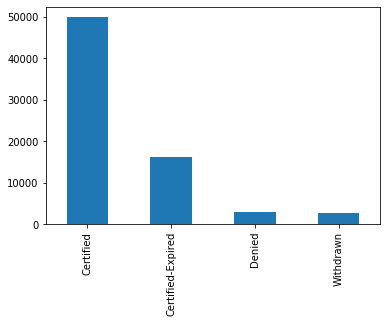

In [26]:
#Total Number of data points of each class
dataset_copy['CASE_STATUS'].value_counts().plot(kind = 'bar')

Since Certified and Certified-Expired are the same we are replacing Certified-Expired with Certified

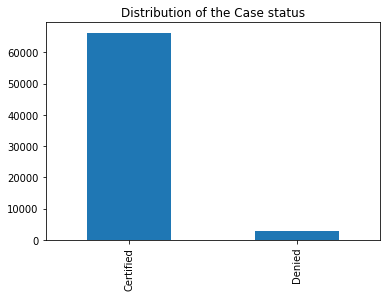

In [31]:
dataset_copy.loc[dataset_copy.CASE_STATUS == 'Certified-Expired', 'CASE_STATUS'] = 'Certified'

dataset_copy = dataset_copy[dataset_copy.CASE_STATUS != 'Withdrawn']

plt.pyplot.title('Distribution of the Case status')
dataset_copy['CASE_STATUS'].value_counts().plot(kind = 'bar')

Majority of the applications have been approved for Permanent Labour Employment Certification

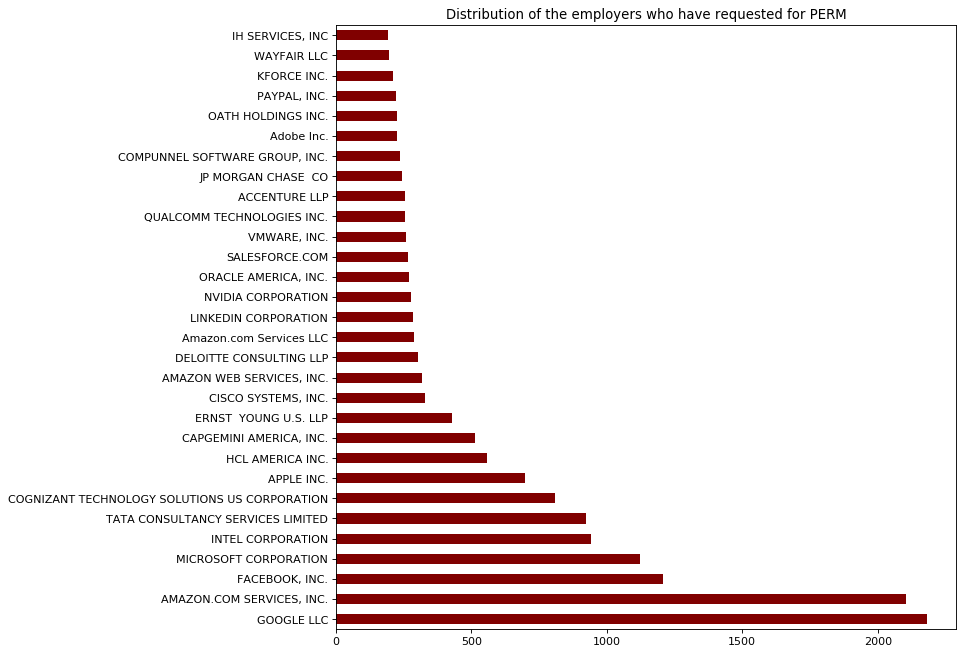

In [51]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.pyplot.title('Distribution of the employers who have requested for PERM')
dataset_copy['EMPLOYER_NAME'].value_counts().head(30).plot(kind = 'barh',color = 'maroon')

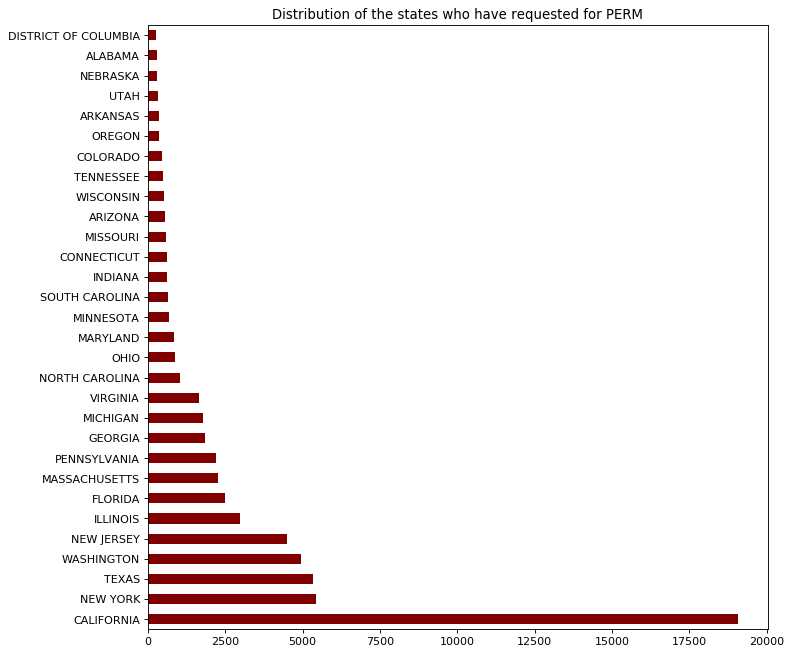

In [52]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.pyplot.title('Distribution of the states who have requested for PERM')
dataset_copy['EMPLOYER_STATE_PROVINCE'].value_counts().head(30).plot(kind = 'barh',color = 'maroon')

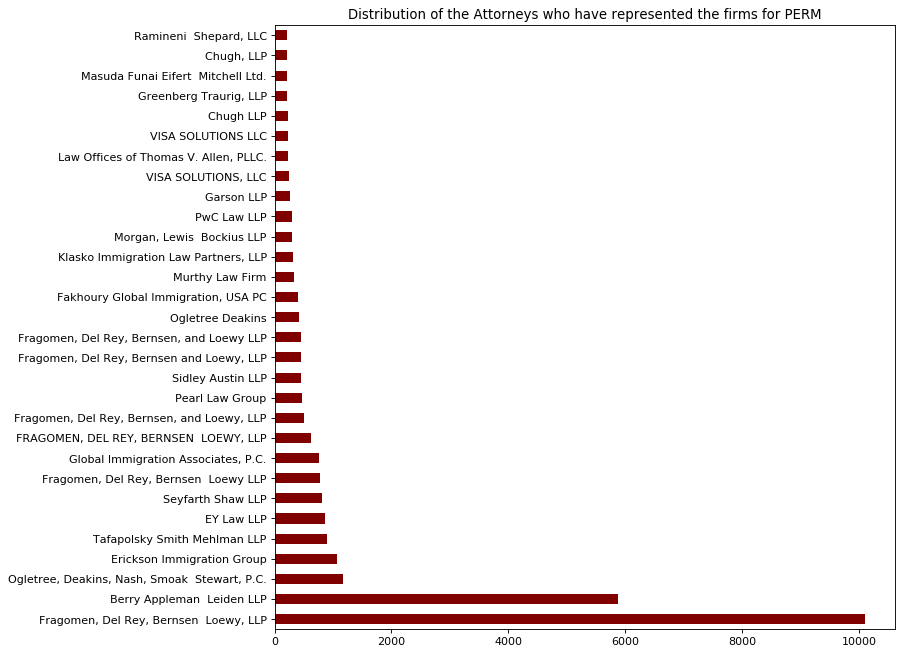

In [39]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.pyplot.title('Distribution of the attorneys who have requested for PERM')
dataset_copy['AGENT_ATTORNEY_FIRM_NAME'].value_counts().head(30).plot(kind = 'barh',color = 'maroon')

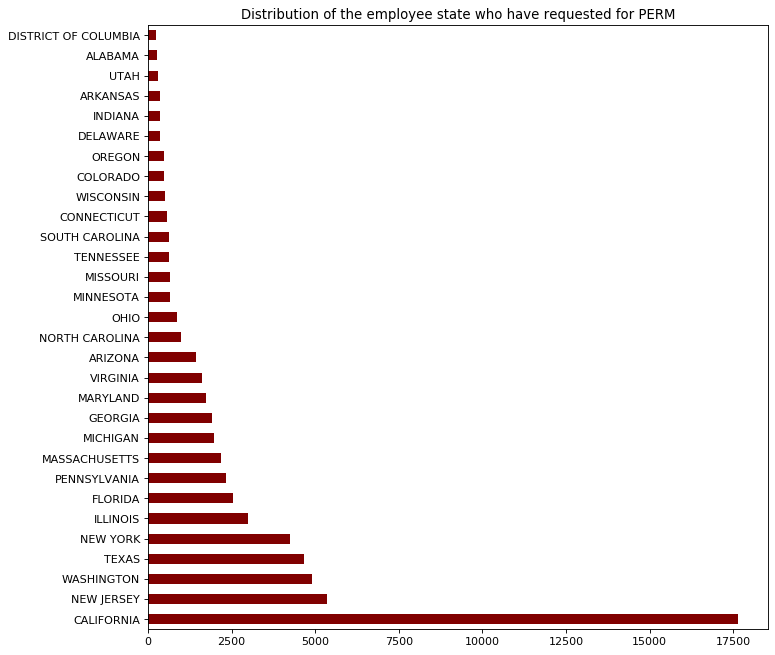

In [53]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.pyplot.title('Distribution of the employee state who have requested for PERM')
dataset_copy['EMP_CONTACT_STATE_PROVINCE'].value_counts().head(30).plot(kind = 'barh',color = 'maroon')

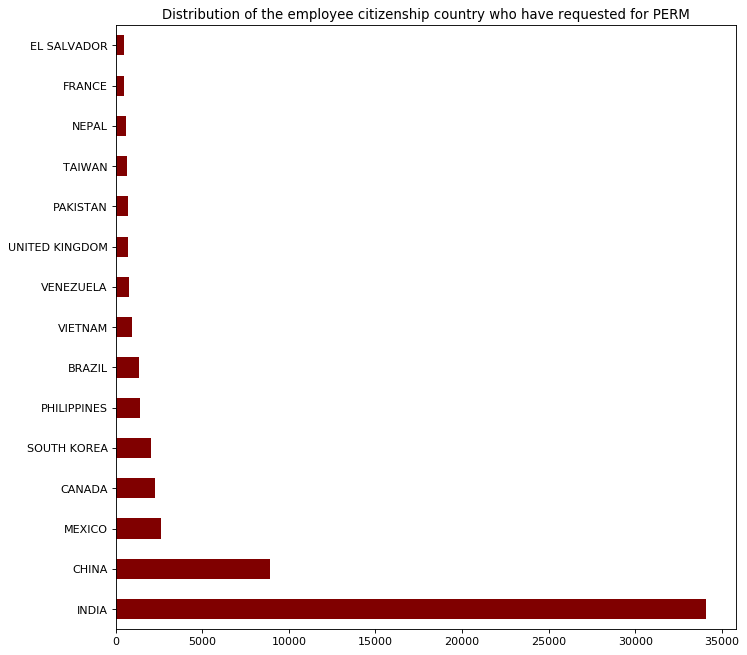

In [55]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.pyplot.title('Distribution of the employee citizenship country who have requested for PERM')
dataset_copy['COUNTRY_OF_CITIZENSHIP'].value_counts().head(15).plot(kind = 'barh',color = 'maroon')

##### Now that we have looked at the distribution of applications across the features, we'll deep dive into these features on the basis of the case status

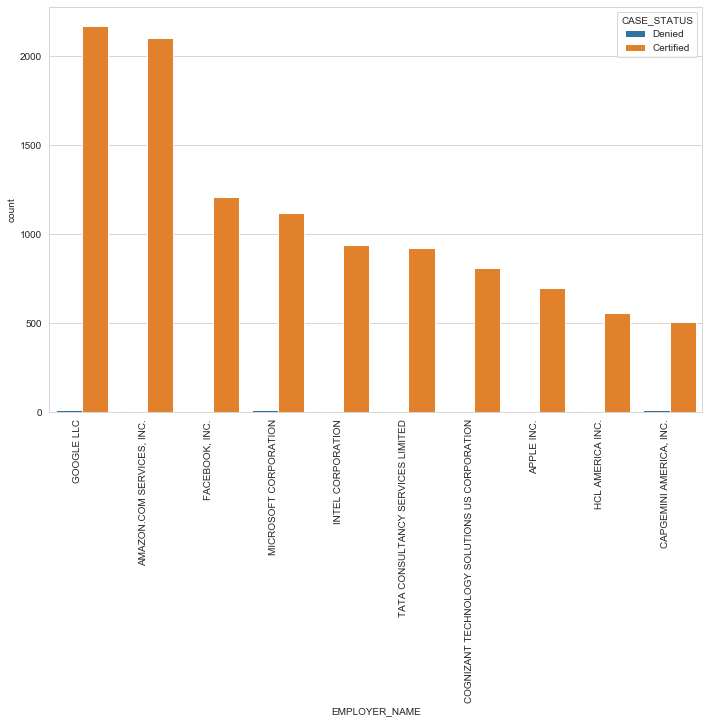

In [74]:
#Graph showing the proportion of Certified and Denied PERM applications for the top 10 companies by number of applicants

sns.set_style("whitegrid")
fig, ax = plt.pyplot.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(ax = ax, x='EMPLOYER_NAME', data = dataset_copy, hue='CASE_STATUS', \
              order=dataset_copy.EMPLOYER_NAME.value_counts().iloc[:10].index,alpha = 1)


fig.autofmt_xdate(rotation=90)

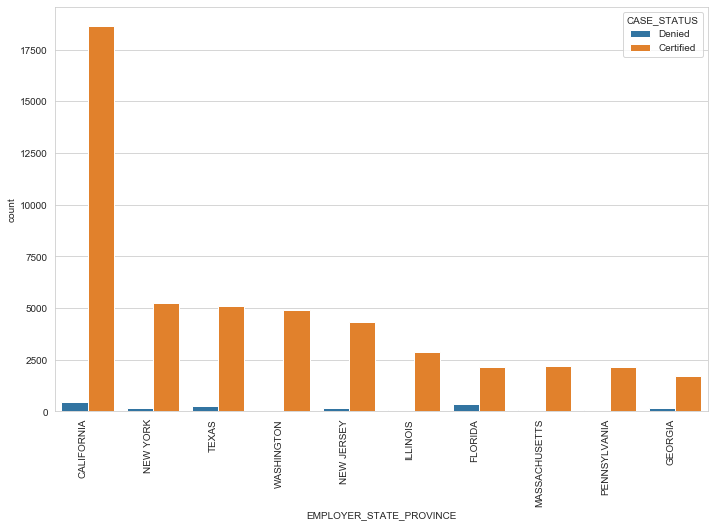

In [75]:
#Graph showing the proportion of Certified and Denied PERM applications for the top 10 companies by number of applicants

sns.set_style("whitegrid")
fig, ax = plt.pyplot.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(ax = ax, x='EMPLOYER_STATE_PROVINCE', data = dataset_copy, hue='CASE_STATUS', \
              order=dataset_copy.EMPLOYER_STATE_PROVINCE.value_counts().iloc[:10].index,alpha = 1)


fig.autofmt_xdate(rotation=90)

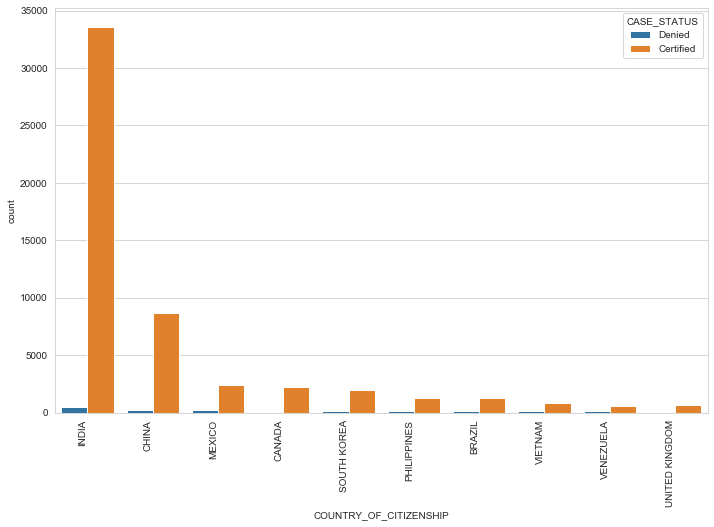

In [76]:
#Graph showing the proportion of Certified and Denied PERM applications for the top 10 companies by number of applicants

sns.set_style("whitegrid")
fig, ax = plt.pyplot.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(ax = ax, x='COUNTRY_OF_CITIZENSHIP', data = dataset_copy, hue='CASE_STATUS', \
              order=dataset_copy.COUNTRY_OF_CITIZENSHIP.value_counts().iloc[:10].index,alpha = 1)


fig.autofmt_xdate(rotation=90)

In [77]:
dataset_copy['PW_SKILL_LEVEL'].unique()

array(['Level I', 'Level III', 'Level IV', 'Level II', nan], dtype=object)

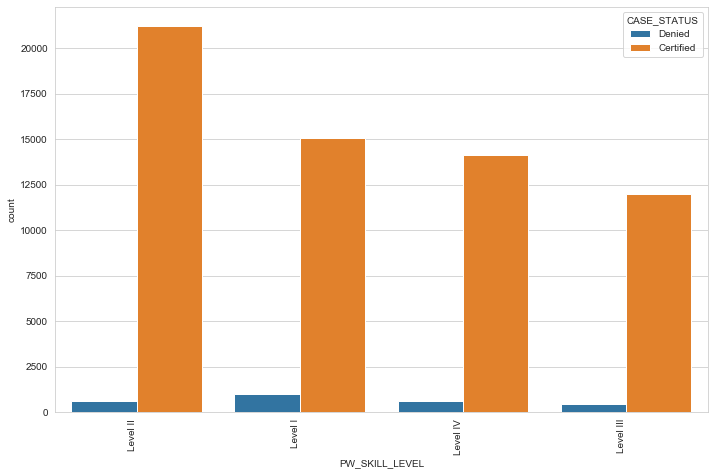

In [78]:
#Graph showing the proportion of Certified and Denied PERM applications for the top 10 companies by number of applicants

sns.set_style("whitegrid")
fig, ax = plt.pyplot.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(ax = ax, x='PW_SKILL_LEVEL', data = dataset_copy, hue='CASE_STATUS', \
              order=dataset_copy.PW_SKILL_LEVEL.value_counts().iloc[:10].index,alpha = 1)


fig.autofmt_xdate(rotation=90)

In [80]:
len(dataset_copy.columns)

60